# Exploratory Data Analysis on all datasets

## Presetting

### Import packages

In [ ]:
## supress warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
## display settings
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 10000000)
pd.set_option('max_info_columns', 10000000)
import os
## Assign dataset path
path_data = 'C:/Users/Cody_Black/JupyterNotebook/Dataset'
os.chdir(path_data)
## Data viz lib
# %matplotlib notebook
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks

### Load datasets

In [5]:
df_A_Test = pd.read_excel(open('Babson Hackathon _ Exhibits A _ B.xlsx', 'rb'), sheet_name='Exhibit A | Test Results') 
df_B_Content = pd.read_excel(open('Babson Hackathon _ Exhibits A _ B.xlsx', 'rb'), sheet_name='Exhibit B | Content Type Defini')  
df_ContentRecomm = pd.read_csv('ContentRecommendationData.csv')
df_ModuleCount = pd.read_csv('ModuleCountData.csv')
df_Supplier = pd.read_csv('SupplierData.csv')

### Recast data types

In [6]:
for col in ['clid', 'clmkcid']:
    df_A_Test[col] = df_A_Test[col].astype('category')
for col in ['prsku', 'clid', 'biccontenttypename', 'hasbiccontenttype']:
    df_ContentRecomm[col] = df_ContentRecomm[col].astype('category')
for col in ['prsku', 'clid']:
    df_ModuleCount[col] = df_ModuleCount[col].astype('category')
for col in ['soid', 'clid', 'clname', 'suid']:
    df_Supplier[col] = df_Supplier[col].astype('category')

## Researching data sets

<h5>df_A_Test and df_B_Content from Exhibit A | Test Results in Babson Hackathon _ Exhibits A _ B.xlsx

|Variable          | Definition|
|:--:             |:--:|
|clid |Product Class ID|
|clname|Product Class Name (i.e. Accent Chairs)|
|biccontenttypename|The recommended content types found from customer research (i.e. Product Feature, Dimensions, etc.)|
|Conversion Rate Change||
|clmkcid|Marketing Category ID|
|mkcname|Marketing Category Name (Classes roll up into Marketing Categories)|

<h5>Definition of conversion rate from self-research:
<h5>Dividing the number of sales (“Total Order Items”) by the number of times people visited your listing,including return visitors (“Sessions”)

In [4]:
df_A_Test.shape

(192, 6)

In [5]:
df_A_Test.head(10)

,clid,clname,biccontenttypename,Conversion Rate Change,clmkcid,mkcname
0,6,TV Stands & Entertainment Centers,Materials / How Its Made,0.03,7,Entertainment Furniture
1,6,TV Stands & Entertainment Centers,Product Capacity,-0.01,7,Entertainment Furniture
2,6,TV Stands & Entertainment Centers,Relative Size & Fit,0.05,7,Entertainment Furniture
3,6,TV Stands & Entertainment Centers,Visual Details,0.02,7,Entertainment Furniture
4,12,Beds,Compatibility & Adjustability,0.05,61,Furniture - Bedroom
5,12,Beds,Dimensions,0.05,61,Furniture - Bedroom
6,12,Beds,Materials / How Its Made,0.07,61,Furniture - Bedroom
7,12,Beds,Product Feature,0.01,61,Furniture - Bedroom
8,13,Dressers & Chests,Assembly & Installation,-0.01,61,Furniture - Bedroom
9,13,Dressers & Chests,Dimensions,0.02,61,Furniture - Bedroom


In [6]:
df_A_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   clid                    192 non-null    int64  
 1   clname                  192 non-null    object 
 2   biccontenttypename      192 non-null    object 
 3   Conversion Rate Change  192 non-null    float64
 4   clmkcid                 192 non-null    int64  
 5   mkcname                 192 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 9.1+ KB


In [3]:
'''
Depend on different type of content, there are different
conversion rate change in each class
'''

df_A_Test.sort_values(by=['clname']).head(10)

,clid,clname,biccontenttypename,Conversion Rate Change,clmkcid,mkcname
55,157,Accent Chests / Cabinets,Visual Details,0.07,116,Accent Furniture
54,157,Accent Chests / Cabinets,Relative Size & Fit,0.01,116,Accent Furniture
53,157,Accent Chests / Cabinets,Materials / How Its Made,-0.01,116,Accent Furniture
52,157,Accent Chests / Cabinets,Dimensions,-0.01,116,Accent Furniture
179,6845,Adirondack Chairs,Weight,-0.01,22,Outdoor
177,6845,Adirondack Chairs,Dimensions,0.05,22,Outdoor
176,6845,Adirondack Chairs,Assembly & Installation,-0.02,22,Outdoor
178,6845,Adirondack Chairs,Materials / How Its Made,-0.01,22,Outdoor
184,7323,Adjustable Beds,Compatibility & Adjustability,0.05,43,Mattresses
186,7323,Adjustable Beds,Product Feature,0.00,43,Mattresses


In [4]:
'''
Which type of content has the highest conversion rate change?

=>Different classes focus on certain content.
For (big) furnitures, people tend to focus on dimension and features of products.
It might be they are usually more expensive and hard to imagine how they fit into their place
'''

df_A_Test.sort_values(by=['Conversion Rate Change', 'biccontenttypename'], ascending=False).head(10)

,clid,clname,biccontenttypename,Conversion Rate Change,clmkcid,mkcname
55,157,Accent Chests / Cabinets,Visual Details,0.07,116,Accent Furniture
139,1337,Mantels,Visual Details,0.07,8,Fireplaces & Grills
23,37,Filing Cabinets,Relative Size & Fit,0.07,121,Furniture - Home Office
78,327,Outdoor Fireplaces,Relative Size & Fit,0.07,8,Fireplaces & Grills
11,13,Dressers & Chests,Product Feature,0.07,61,Furniture - Bedroom
18,32,Desks,Product Feature,0.07,121,Furniture - Home Office
62,230,Ceiling Fans,Product Feature,0.07,15,Lighting
81,371,Cribs,Product Feature,0.07,32,Nursery
93,590,Tubs And Whirlpools,Product Feature,0.07,24,Plumbing - Core
110,1009,Smokers,Product Feature,0.07,8,Fireplaces & Grills


In [8]:
df_B_Content.head()

,Content Type,Definition,Example
0,About the Brand,Share your brand’s story to further engage cus...,https://www.wayfair.com/outdoor/pdp/polywood-h...
1,Assembly & Installation,Show how a product is installed or assembled,https://www.wayfair.com/pet/pdp/petmate-compas...
2,Awards,Tell customers when a product has been recogni...,https://www.wayfair.com/furniture/pdp/ebern-de...
3,Cleaning & Care,Let customers know how to care for their product,https://www.wayfair.com/outdoor/pdp/mercury-ro...
4,Compatibility & Adjustability,State how the product adjusts and interacts wi...,https://www.wayfair.com/outdoor/pdp/orren-elli...


<h5>df_ContentRecomm from ContentRecommendationData.csv

|Variable          | Definition | 
|:--:             |:--:|
|prsku|Product ID (i.e. SKU Number)|
|clid|Product Class ID|
|percentilerank|Rank of SKU from a prioritization model (we encourage you to build your own model!)|
|biccontenttypename|The recommended content types found from customer research (i.e. Product Feature, Dimensions, etc.)|
|hasbiccontenttype|Whether or not the sku has recommended Waymore content (1 = Yes, 0 = No)|

In [10]:
df_ContentRecomm.head()

,prsku,clid,percentilerank,biccontenttypename,hasbiccontenttype
0,AACF1003,15,NaN,Materials / How Its Made,0
1,AACF1020,15,NaN,Warranty & Guarantees,0
2,AACF1025,15,NaN,Materials / How Its Made,0
3,AACF1042,15,NaN,Relative Size & Fit,0
4,AACF1057,15,NaN,Materials / How Its Made,0


In [11]:
df_ContentRecomm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7652996 entries, 0 to 7652995
Data columns (total 5 columns):
 #   Column              Dtype  
---  ------              -----  
 0   prsku               object 
 1   clid                int64  
 2   percentilerank      float64
 3   biccontenttypename  object 
 4   hasbiccontenttype   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 291.9+ MB


<h5>df_ModuleCount from ModuleCountData.csv

|Variable          | Definition|
|:--:             |:--:|
|prsku|Product ID (i.e. SKU Number)|
|modulecount|The number of modules on a given sku (see example of what a module looks like to the right)|
|clid|Product Class ID Number|
|clname|Product Class Name (i.e. Accent Chairs)|
|mkcname|Marketing Category Name (Classes roll up into Marketing Categories)|


In [13]:
df_ModuleCount.head()

,prsku,modulecount,clid,clname,mkcname
0,AAOJ1497,1,34,Wall Art,Wall Art
1,ACFT1051,1,9,Bar Stools,Furniture - Kitchen and Dining
2,ACOT1466,1,34,Wall Art,Wall Art
3,ACOT4005,1,15,Area Rugs,Rugs
4,ACOT4710,4,15,Area Rugs,Rugs


In [14]:
df_ModuleCount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196910 entries, 0 to 196909
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   prsku        196910 non-null  object
 1   modulecount  196910 non-null  int64 
 2   clid         196910 non-null  int64 
 3   clname       196910 non-null  object
 4   mkcname      196910 non-null  object
dtypes: int64(2), object(3)
memory usage: 7.5+ MB


<h5>df_Supplier from SupplierData.csv

|Variable          | Definition|
|:--:             |:--:|
|prsku|Product ID (i.e. SKU Number)|
|soid|Store ID Number|
|soname|Store ID Name (i.e. Wayfair, AllModern, Joss&Main, Wayfair DE (Germany), etc.)|
|clid|Product Class ID Number|
|clname|Product Class Name (i.e. Accent Chairs)|
|mkcname|Marketing Category Name (Classes roll up into Marketing Categories)|
|suid|Supplier ID Number (1 = Aggregated data for a given SKU, Store combination)|
|iswaymore|A flag of whether the SKU has Waymore content or not, 1 = has Waymore, 0 = doesn't have Waymore|
|addedtocart|The number of SKUs being added to cart in 30 days period|
|placedorder|The number of SKUs being purchased in 30 days period|
|trafficcount|The traffic amount in 30 days period|
|iscurrent|A flag of whether the SKU is from the current snapshot of Merch Cube, 1 = |current, 0 = 30 days ago snapshot|
|videocount|The number of SKUs having videos on PDP|
|grs1month|1 month Revenue of the SKU (Snapshot date minus 1 month), e.g. today is 1/13/2020, the 1 month Revenue is the Revenue between 12/13/2019 and 1/13/2020|
|grs2month|2 month Revenue of the SKU (Snapshot date minus 2 month), e.g. today is 1/13/2020, the 2 month Revenue is the Revenue between 11/13/2019 and 1/13/2020|
|grs3month|3 month Revenue of the SKU (Snapshot date minus 3 month), e.g. today is 1/13/2020, the 3 month Revenue is the Revenue between 10/13/2019 and 1/13/2020|
|grs12month|12 month Revenue of the SKU (Snapshot date minus 12 month), e.g. today is 1/13/2020, the 12 month Revenue is the Revenue between 01/13/2019 and 1/13/2020|
|weightedavgscore|Weighted Average score of SKU from a prioritization model (we encourage you to build your own model!)|
|percentilerank|Rank of SKU from a prioritization model (we encourage you to build your own model!)|
|expectedgrs|Projected Revenue over the "remaining life" of a SKU|


In [16]:
df_Supplier.head()

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs
0,AAAM1028,3,Wayfair UK,21,Cribs,Nursery,1,0,0,0,14,1,0,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN
1,AABK1087,4,Wayfair DE,18,Mattress Toppers and Pads,Mattresses - Utility Bedding,7080,0,45,5,1362,1,0,265.558272,857.66493,3759.433838,6547.578930,NaN,NaN,NaN
2,AACE1000,6,Wayfair CA,15,Area Rugs,Rugs,1,0,0,0,0,1,0,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN
3,AACF1003,3,Wayfair UK,15,Area Rugs,Rugs,4312,0,0,0,25,1,0,0.000000,0.00000,0.000000,342.437186,NaN,NaN,NaN
4,AACF1005,3,Wayfair UK,15,Area Rugs,Rugs,1,0,1,0,7,1,0,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN


In [17]:
df_Supplier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9358854 entries, 0 to 9358853
Data columns (total 20 columns):
 #   Column            Dtype  
---  ------            -----  
 0   prsku             object 
 1   soid              int64  
 2   soname            object 
 3   clid              int64  
 4   clname            object 
 5   mkcname           object 
 6   suid              int64  
 7   iswaymore         int64  
 8   addedtocart       int64  
 9   placedorder       int64  
 10  trafficcount      int64  
 11  iscurrent         int64  
 12  videocount        int64  
 13  grs1month         float64
 14  grs2month         float64
 15  grs3month         float64
 16  grs12month        float64
 17  weightedavgscore  float64
 18  percentilerank    float64
 19  expectedgrs       float64
dtypes: float64(7), int64(9), object(4)
memory usage: 1.4+ GB


In [11]:
df_Supplier.describe(include = 'all') # show summary statistics

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs
count,9358854,9358854.0,9358854,9358854.0,9358854,9358854,9358854.0,9.358854e+06,9.358854e+06,9.358854e+06,9.358854e+06,9.358854e+06,9.358854e+06,9.358854e+06,9.358854e+06,9.358854e+06,9.358854e+06,6.078664e+06,6.121377e+06,6.078664e+06
unique,1942518,8.0,8,48.0,48,26,6169.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,MITN4124,1.0,Wayfair,34.0,Wall Art,Wall Art,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,44,3780277.0,3780277,5097242.0,5097242,5097242,7506622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.188279e-01,5.734341e+00,7.952598e-01,9.891117e+01,5.015544e-01,6.947784e-02,1.522455e+02,3.368113e+02,4.912457e+02,1.724138e+03,1.000630e+00,5.328596e-01,3.201469e+03
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.235859e-01,9.129203e+01,1.579730e+01,1.203016e+03,4.999976e-01,3.155802e-01,2.666304e+03,5.960243e+03,8.314173e+03,2.763477e+04,3.436328e-01,2.959089e-01,1.242026e+04
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.077902e+02,-1.077902e+02,-1.077902e+02,-1.106054e+03,3.500000e-01,0.000000e+00,-1.197184e+02
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.700000e-01,2.800000e-01,4.901160e+01
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.010000e+00,5.500000e-01,4.987452e+02
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.528816e+01,1.220000e+00,7.900000e-01,2.598263e+03


In [9]:
'''
How many unique product under each class?
### Warning: Running out of time
### Probably too many prsku under class
'''

# df_Supplier.groupby(['clname', 'prsku']).count() 
# # .reset_index(name='count') \
# #                              .sort_values(['count'], ascending=False)


'''
In unique product perspective, "Cat Litter Boxes & Litter Box Enclosures" is not in top 10
Top 5 are Wall Art, Area Rugs, Bedding Sets, Chandeliers,and End Tables
'''

df_Supplier.groupby(['clname'])['prsku'].nunique().sort_values(ascending=False)

clname
Wall Art                                    1146615
Area Rugs                                    437579
Bedding Sets                                  65737
Chandeliers                                   35353
End Tables                                    34676
Sofas                                         25681
Bar Stools                                    20262
Vanities                                      18733
Dressers & Chests                             17051
Dining Table Sets                             17017
Beds                                          16607
TV Stands & Entertainment Centers             16363
Desks                                         12956
Tubs And Whirlpools                            9984
Outdoor Conversation Sets                      9318
Kids Beds                                      7812
Headboards                                     6775
Accent Chests / Cabinets                       6245
Bathroom Storage                               5426
Patio

In [18]:
'''
Group by store name. There are 8 stores
'''
df_Supplier.groupby(['soname']).count()
# df_Supplier[df_Supplier.groupby(['suid'])['suid'].transform('count') > 10000].groupby(['suid']).count()

,prsku,soid,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs
soname,,,,,,,,,,,,,,,,,,,
AllModern,54660,54660,54660,54660,54660,54660,54660,54660,54660,54660,54660,54660,54660,54660,54660,54660,41991,42292,41991
Birch Lane,64233,64233,64233,64233,64233,64233,64233,64233,64233,64233,64233,64233,64233,64233,64233,64233,52951,53492,52951
Joss & Main,86351,86351,86351,86351,86351,86351,86351,86351,86351,86351,86351,86351,86351,86351,86351,86351,68887,69375,68887
Perigold,246337,246337,246337,246337,246337,246337,246337,246337,246337,246337,246337,246337,246337,246337,246337,246337,142,146,142
Wayfair,3780277,3780277,3780277,3780277,3780277,3780277,3780277,3780277,3780277,3780277,3780277,3780277,3780277,3780277,3780277,3780277,2316619,2332416,2316619
Wayfair CA,3125167,3125167,3125167,3125167,3125167,3125167,3125167,3125167,3125167,3125167,3125167,3125167,3125167,3125167,3125167,3125167,2036793,2050606,2036793
Wayfair DE,978713,978713,978713,978713,978713,978713,978713,978713,978713,978713,978713,978713,978713,978713,978713,978713,757639,763456,757639
Wayfair UK,1023116,1023116,1023116,1023116,1023116,1023116,1023116,1023116,1023116,1023116,1023116,1023116,1023116,1023116,1023116,1023116,803642,809594,803642


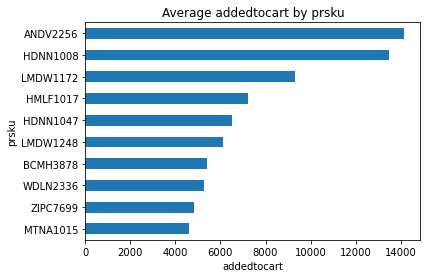

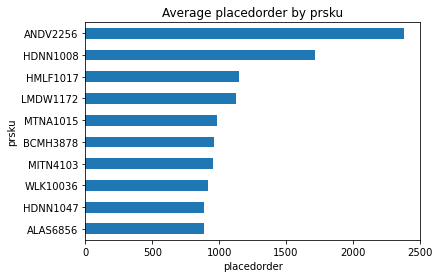

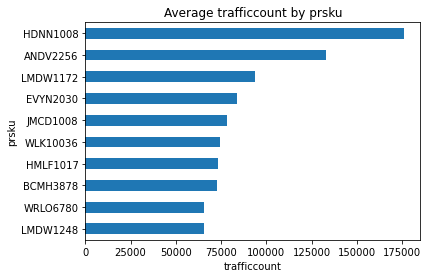

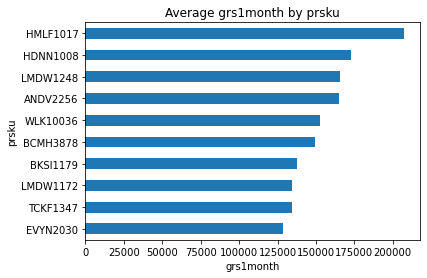

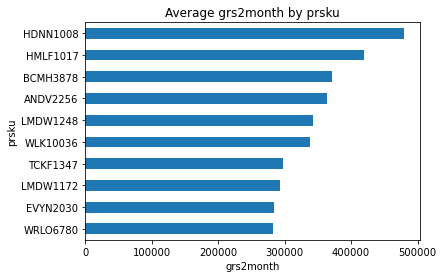

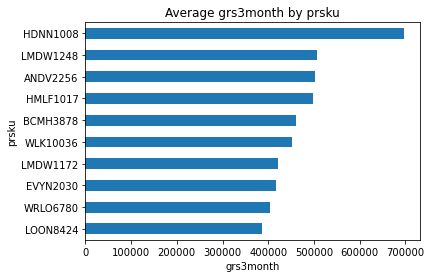

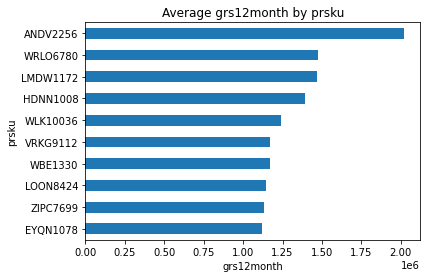

In [22]:
'''
Plot barchart grouping by productID and see their average performance in different metrics

The top 3-5 prodcuts are pretty much the same
'''
performance = ['addedtocart', 'placedorder', 'trafficcount', 'grs1month', 'grs2month', 'grs3month', 'grs12month']
gb_column = 'prsku'
for col in performance:
    df_Supplier.groupby([gb_column])[col].mean().nlargest(10).plot(kind='barh',title = "Average "+col+" by " + gb_column).invert_yaxis()
    plt.xlabel(col)
    plt.show();

In [7]:
'''
Does each product has multiple rows?
Why is that and what is the different among them?

Let's take the prsku = ANDV2256 which has the highest average of placedorder to investigate


1. They came from different stores
2. They have same class id
3. There are few rows has null value within columns weightedavgscore, percentilerank, and expectedgrs
3.1 weightedavgscore, percentilerank, and expectedgrs will have null value at the same time
3.2 Same SKUid will have same values in weightedavgscore, percentilerank, and expectedgrs
3.3 Some of suppliers(suid) have null values (****Not sure if we can fill in these NaN by the other values)

'''

df_Supplier[df_Supplier['prsku']=='ANDV2256'].sort_values(by=['soid', 'suid']).head(15)

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs
234061,ANDV2256,1,Wayfair,2,Beds,Furniture - Bedroom,1,0,25353,3827,241215,1,0,654538.891988,1.490207e+06,2.179117e+06,8.499131e+06,1.79,0.99,766960.2692
482043,ANDV2256,1,Wayfair,2,Beds,Furniture - Bedroom,1,0,22989,4413,200887,0,0,744092.625530,1.562331e+06,2.015432e+06,8.403586e+06,1.79,0.99,766960.2692
461403,ANDV2256,1,Wayfair,2,Beds,Furniture - Bedroom,5,0,25353,3827,241215,1,0,5605.206334,1.239373e+04,1.961144e+04,8.378295e+04,NaN,NaN,NaN
474945,ANDV2256,1,Wayfair,2,Beds,Furniture - Bedroom,5,0,22989,4413,200887,0,0,6612.359096,1.402600e+04,2.875639e+04,8.041575e+04,NaN,NaN,NaN
490555,ANDV2256,1,Wayfair,2,Beds,Furniture - Bedroom,34,0,22989,4413,200887,0,0,737622.845042,1.548750e+06,1.987596e+06,8.326199e+06,1.79,0.99,766960.2692
596596,ANDV2256,1,Wayfair,2,Beds,Furniture - Bedroom,34,0,25353,3827,241215,1,0,649162.469586,1.478192e+06,2.160178e+06,8.418515e+06,1.79,0.99,766960.2692
391340,ANDV2256,1,Wayfair,2,Beds,Furniture - Bedroom,8935,0,22989,4413,200887,0,0,127.313600,1.273136e+02,1.273136e+02,1.273136e+02,NaN,NaN,NaN
490556,ANDV2256,1,Wayfair,2,Beds,Furniture - Bedroom,8935,0,25353,3827,241215,1,0,0.000000,1.273136e+02,1.273136e+02,1.273136e+02,NaN,NaN,NaN
550164,ANDV2256,1,Wayfair,2,Beds,Furniture - Bedroom,11240,0,22989,4413,200887,0,0,0.000000,0.000000e+00,1.350269e+02,1.350269e+02,NaN,NaN,NaN
1436515,ANDV2256,1,Wayfair,2,Beds,Furniture - Bedroom,11240,0,25353,3827,241215,1,0,0.000000,0.000000e+00,0.000000e+00,1.350269e+02,NaN,NaN,NaN


In [8]:
'''
4. When suid differs, the addedtocart, placedorder, trafficcount, and iscurrent won't change accordingly.
    However, the grs1month, grs2month, grs3month, and grs12month are all different.
4.1 Same suid will have a cycle, for the same cycle, all columns mentioned above will have same value, but 
    will be different when getting into next cycle
4.2 Different soid will lead to different suid in the cycle
'''
df_Supplier[df_Supplier['prsku']=='ANDV2256'].sort_values(by=['addedtocart', 'suid']).head(15)

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs
14767,ANDV2256,6,Wayfair CA,2,Beds,Furniture - Bedroom,1,0,1471,166,21945,1,0,31787.584918,9.427253e+04,1.620162e+05,6.395945e+05,1.79,0.99,766960.2692
490557,ANDV2256,6,Wayfair CA,2,Beds,Furniture - Bedroom,5,0,1471,166,21945,1,0,0.000000,0.000000e+00,0.000000e+00,6.970535e+03,NaN,NaN,NaN
355807,ANDV2256,6,Wayfair CA,2,Beds,Furniture - Bedroom,34,0,1471,166,21945,1,0,721.057268,2.871810e+04,6.171195e+04,3.449069e+05,1.79,0.99,766960.2692
535620,ANDV2256,6,Wayfair CA,2,Beds,Furniture - Bedroom,5598,0,1471,166,21945,1,0,31066.527650,6.555443e+04,1.003042e+05,2.880016e+05,1.79,0.99,766960.2692
451614,ANDV2256,6,Wayfair CA,2,Beds,Furniture - Bedroom,1,0,1855,263,23430,0,0,54595.171894,1.258617e+05,1.713073e+05,6.561210e+05,1.79,0.99,766960.2692
68918,ANDV2256,6,Wayfair CA,2,Beds,Furniture - Bedroom,5,0,1855,263,23430,0,0,0.000000,0.000000e+00,5.285062e+02,6.970535e+03,NaN,NaN,NaN
82034,ANDV2256,6,Wayfair CA,2,Beds,Furniture - Bedroom,34,0,1855,263,23430,0,0,17748.926122,5.435364e+04,7.254432e+04,3.714495e+05,1.79,0.99,766960.2692
550165,ANDV2256,6,Wayfair CA,2,Beds,Furniture - Bedroom,5598,0,1855,263,23430,0,0,36846.245772,7.150804e+04,9.825603e+04,2.779855e+05,1.79,0.99,766960.2692
482043,ANDV2256,1,Wayfair,2,Beds,Furniture - Bedroom,1,0,22989,4413,200887,0,0,744092.625530,1.562331e+06,2.015432e+06,8.403586e+06,1.79,0.99,766960.2692
474945,ANDV2256,1,Wayfair,2,Beds,Furniture - Bedroom,5,0,22989,4413,200887,0,0,6612.359096,1.402600e+04,2.875639e+04,8.041575e+04,NaN,NaN,NaN


In [26]:
'''
Let's dig into class level to see their performance.

1. Although Cat Litter Boxes & Litter Box Enclosures has a highest average in placedorder, but its
    standard deviation is high too
'''
df_Supplier.groupby(['clname']).agg(['mean', 'std', 'min', 'max']) # .sort_values(by=['placedorder', 'addedtocart', 'trafficcount'], ascending=False)

iswaymore                    \
                                              mean       std min max   
clname                                                                 
Accent Chests / Cabinets                  0.092082  0.289145   0   1   
Adirondack Chairs                         0.266438  0.442138   0   1   
Adjustable Beds                           0.324183  0.468375   0   1   
Air Fryers                                0.479012  0.499662   0   1   
Area Rugs                                 0.174458  0.379503   0   1   
Bar Stools                                0.274791  0.446411   0   1   
Bathroom Storage                          0.059849  0.237209   0   1   
Bedding Sets                              0.009134  0.095132   0   1   
Beds                                      0.076690  0.266100   0   1   
Cat Litter Boxes & Litter Box Enclosures  0.139048  0.346106   0   1   
Ceiling Fans                              0.051933  0.221896   0   1   
Chandeliers                               0.039368  0.194469   0   1   
Charcoal Grills                           0.166296  0.372450   0   1   
Classroom Storage                         0.318464  0.465906   0   1   
Cribs                                     0.209555  0.407011   0   1   
Desks                                     0.087240  0.282188   0   1   
Dining Table Sets                         0.033078  0.178842   0   1   
Dressers & Chests                         0.029048  0.167941   0   1   
Electric Grills                           0.055556  0.229206   0   1   
End Tables                                0.042467  0.201651   0   1   
Filing Cabinets                           0.154381  0.361324   0   1   
Garage Storage Cabinets                   0.062139  0.241425   0   1   
Gas Grills                                0.122267  0.327619   0   1   
Gliders                                   0.259911  0.438640   0   1   
Headboards                                0.172968  0.378225   0   1   
Innerspring Mattresses                    0.745505  0.435644   0   1   
Interior Doors                            0.057456  0.232720   0   1   
Kids Beds                                 0.091632  0.288509   0   1   
Kids Dressers & Chests                    0.080376  0.271889   0   1   
Kitchen Islands                           0.119459  0.324339   0   1   
Mantels                                   0.168000  0.373981   0   1   
Mattress Toppers and Pads                 0.174684  0.379715   0   1   
Outdoor Conversation Sets                 0.236229  0.424768   0   1   
Outdoor Fireplaces                        0.110104  0.313027   0   1   
Pantry Cabinets                           0.026420  0.160393   0   1   
Patio Sofas                               0.129388  0.335639   0   1   
Pool Tables                               0.700521  0.458229   0   1   
Ranges                                    0.523810  0.499613   0   1   
Reception Seating Chairs                  0.028219  0.165609   0   1   
Smokers                                   0.174627  0.379789   0   1   
Sofas                                     0.097403  0.296507   0   1   
Swing Sets & Playgrounds                  0.555470  0.497010   0   1   
TV Stands & Entertainment Centers         0.057558  0.232907   0   1   
Tubs And Whirlpools                       0.112686  0.316212   0   1   
Vanities                                  0.048986  0.215839   0   1   
Wall Art                                  0.112178  0.315585   0   1   
Wine Refrigerators                        0.424227  0.494288   0   1   
Wood Pellet Grills                        0.390052  0.488401   0   1   

                                         addedtocart                         \
                                                mean         std min    max   
clname                                                                        
Accent Chests / Cabinets                   19.893984  107.289554   0   6066   
Adirondack Chairs                           7.499524

In [6]:
df_Supplier.groupby(['mkcname']).agg(['count', 'mean'])

soid               clid             \
                                  count      mean    count       mean   
mkcname                                                                 
Accent Furniture                  42701  3.637409    42701  14.000000   
Appliances                         5299  2.551614     5299  27.523118   
Bedding                          356706  3.379582   356706  33.000000   
Education                          9169  2.956702     9169  23.000000   
Entertainment Furniture          327807  3.574451   327807  15.186228   
Fireplaces & Grills               30959  3.299041    30959  27.721535   
Furniture - Bedroom              253014  3.456659   253014   2.753385   
Furniture - Home Office          107450  3.461582   107450   5.151373   
Furniture - Kitchen and Dining   249549  3.398727   249549  11.038041   
Hardware                          13332  3.173642    13332  44.000000   
Lighting                         232982  3.525663   232982  35.752616   
Mattresses                         3991  3.876221     3991  43.766725   
Mattresses - Utility Bedding      10602  3.459819    10602  18.000000   
Nursery                           14167  3.430013    14167  19.860450   
Office                             8930  3.156439     8930   7.000000   
Outdoor                           80515  3.476992    80515  13.000596   
Pet                                1575  3.339048     1575  32.000000   
Plumbing - Core                   53112  3.456582    53112  24.000000   
Plumbing - Vanities              105868  3.448417   105868  13.000000   
Recreation                         3739  2.920834     3739  27.232415   
Rugs                            2105737  3.630169  2105737  15.000000   
Small Electrics                    2430  3.146914     2430  25.000000   
Storage and Org                   44070  3.426027    44070  36.826912   
Upholstery - Core                144307  3.507730   144307  19.000000   
Wall Art                        5097242  3.418377  5097242  34.000000   
Youth Bedroom                     53601  3.364769    53601  32.413108   

                                   suid              iswaymore            \
                                  count         mean     count      mean   
mkcname                                                                    
Accent Furniture                  42701   871.679071     42701  0.092082   
Appliances                         5299  1846.465748      5299  0.450274   
Bedding                          356706   878.769513    356706  0.009134   
Education                          9169   513.747301      9169  0.318464   
Entertainment Furniture          327807  1356.352924    327807  0.047363   
Fireplaces & Grills               30959  1785.804483     30959  0.123809   
Furniture - Bedroom              253014  1213.652525    253014  0.071814   
Furniture - Home Office          107450  1488.488125    107450  0.097403   
Furniture - Kitchen and Dining   249549  1282.552144    249549  0.162830   
Hardware                          13332  2264.524827     13332  0.057456   
Lighting                         232982  1043.558962    232982  0.040651   
Mattresses                         3991  1677.596843      3991  0.664746   
Mattresses - Utility Bedding      10602  2022.990662     10602  0.174684   
Nursery                           14167  1315.565469     14167  0.223901   
Office                             8930  1074.766853      8930  0.028219   
Outdoor                           80515  1350.096516     80515  0.215215   
Pet                                1575  1539.151746      1575  0.139048   
Plumbing - Core                   53112   903.213059     53112  0.112686   
Plumbing - Vanities              105868  1329.297663    105868  0.048986   
Recreation                         3739  1328.773736      3739  0.600160   
Rugs                            2105737   573.412080   2105737  0.174458   
Small Electrics                    2430  1947.863786      2430  0.479012   
Storage and Org  

In [10]:
df_Supplier.groupby(['clname']).mean().sort_values(by=['placedorder', 'addedtocart', 'trafficcount'], ascending=False)

,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs
clname,,,,,,,,,,,,,
Cat Litter Boxes & Litter Box Enclosures,0.139048,99.092063,24.856508,1463.516190,0.500952,0.092063,1527.356037,3288.090326,4707.682637,16207.398125,1.510978,0.903128,14035.531903
Innerspring Mattresses,0.745505,132.920025,21.559826,1247.135462,0.493180,0.651891,6619.442004,15089.488526,20553.753445,62639.031722,1.653534,0.912053,93662.849452
Air Fryers,0.479012,32.792593,9.160082,331.979835,0.501235,0.203704,664.363836,1476.533377,1824.234174,3957.346538,1.131304,0.650290,2916.726872
Gliders,0.259911,54.659564,9.048067,1024.559960,0.491576,0.161546,2196.661938,4783.066929,6698.400253,23938.150155,1.509312,0.901759,28700.327874
Mattress Toppers and Pads,0.174684,37.788625,8.830126,378.346916,0.503584,0.072439,627.282888,1340.275994,1851.180298,6130.064312,1.274152,0.766069,6753.073334
Mantels,0.168000,42.457846,8.556923,1326.175385,0.507692,0.088615,1695.844656,4232.511369,6813.796816,17466.643749,1.293739,0.795217,12569.494963
Beds,0.076690,54.026508,6.534054,1012.780804,0.503009,0.034132,1638.571799,3616.222270,5244.065696,17988.763764,1.484069,0.882373,20935.493159
Adjustable Beds,0.324183,58.475817,6.373856,1028.117647,0.484967,0.260131,4481.586299,9138.045295,12402.555122,35312.776665,1.586851,0.936575,28293.767004
Cribs,0.209555,35.919455,5.720955,732.600237,0.498075,0.060014,1086.233477,2343.376754,3381.748586,13101.019669,1.418264,0.867837,16313.488320


In [9]:
'''
Let's first focus on the top class with highest placedorder, Cat Litter Boxes & Litter Box Enclosures, and see
within the class, how to differentiate different subgroups
'''

pd.merge(df_Supplier[df_Supplier['clname']=='Cat Litter Boxes & Litter Box Enclosures'], 
                df_ModuleCount, how='left', 
                left_on=['prsku'], right_on=['prsku'], 
                suffixes=('', '_CR')).sort_values(by=['suid', 'modulecount', 'soid']).head(10)

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs,modulecount,clid_CR,clname_CR,mkcname_CR
17,AOSC1605,1,Wayfair,32,Cat Litter Boxes & Litter Box Enclosures,Pet,1,1,2695,692,20533,0,1,46987.066634,100246.223202,132356.872866,399475.069038,1.69,0.99,41338.4552,1.0,32,Cat Litter Boxes & Litter Box Enclosures,Pet
50,AOSC1609,1,Wayfair,32,Cat Litter Boxes & Litter Box Enclosures,Pet,1,1,1709,542,19343,1,2,66494.127772,145497.350006,194984.344572,675354.156578,1.79,0.99,65043.7606,1.0,32,Cat Litter Boxes & Litter Box Enclosures,Pet
59,AOSC1521,1,Wayfair,32,Cat Litter Boxes & Litter Box Enclosures,Pet,1,1,232,46,2855,0,0,1841.272188,4042.536082,6100.430988,27682.690928,1.62,0.98,2610.3706,1.0,32,Cat Litter Boxes & Litter Box Enclosures,Pet
80,AOSC1035,1,Wayfair,32,Cat Litter Boxes & Litter Box Enclosures,Pet,1,1,628,187,7971,1,0,29009.471976,45001.175540,57269.623140,226135.020176,1.79,0.99,10876.1854,1.0,32,Cat Litter Boxes & Litter Box Enclosures,Pet
110,AOSC1605,1,Wayfair,32,Cat Litter Boxes & Litter Box Enclosures,Pet,1,1,1979,493,15680,1,1,34411.572358,85752.578744,134176.790792,403906.778562,1.69,0.99,41338.4552,1.0,32,Cat Litter Boxes & Litter Box Enclosures,Pet
114,AOSC1034,1,Wayfair,32,Cat Litter Boxes & Litter Box Enclosures,Pet,1,1,456,80,7058,1,0,8044.250690,19826.572120,33483.784650,181616.410838,1.87,1.00,10771.3942,1.0,32,Cat Litter Boxes & Litter Box Enclosures,Pet
121,AOSC1614,1,Wayfair,32,Cat Litter Boxes & Litter Box Enclosures,Pet,1,1,341,99,8210,0,0,14387.987518,33286.445092,44988.560364,186790.978298,1.87,1.00,16778.7462,1.0,32,Cat Litter Boxes & Litter Box Enclosures,Pet
148,AOSC1034,1,Wayfair,32,Cat Litter Boxes & Litter Box Enclosures,Pet,1,1,495,101,8310,0,0,10490.526806,24172.236112,43725.708434,184461.543430,1.87,1.00,10771.3942,1.0,32,Cat Litter Boxes & Litter Box Enclosures,Pet
180,AOSC1035,1,Wayfair,32,Cat Litter Boxes & Litter Box Enclosures,Pet,1,1,352,92,5264,0,0,15848.955728,29017.283940,39304.049202,224122.630670,1.79,0.99,10876.1854,1.0,32,Cat Litter Boxes & Litter Box Enclosures,Pet
183,AWI10003,1,Wayfair,32,Cat Litter Boxes & Litter Box Enclosures,Pet,1,1,81,13,709,1,0,308.827694,666.902082,1077.446800,3360.058294,NaN,NaN,NaN,1.0,32,Cat Litter Boxes & Litter Box Enclosures,Pet


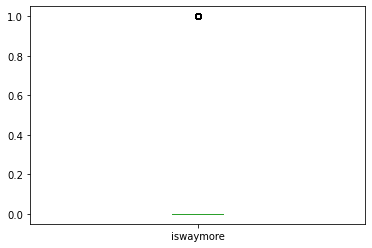

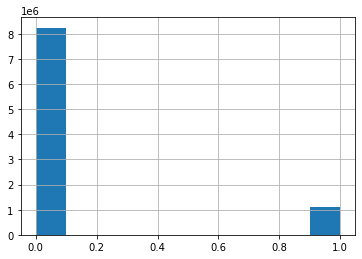

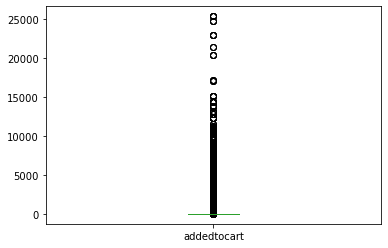

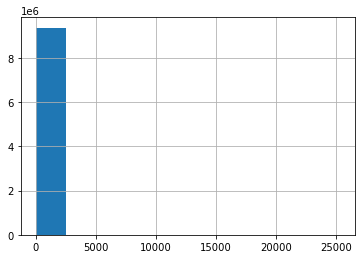

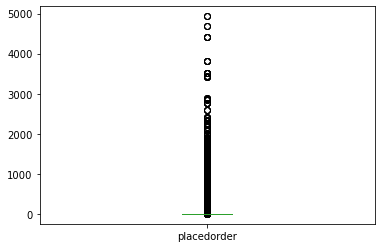

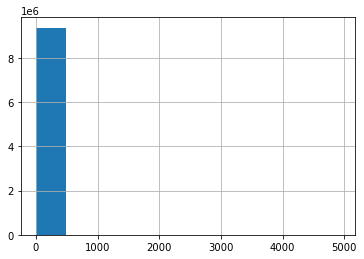

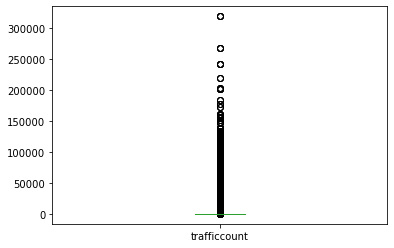

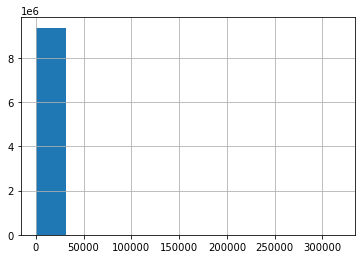

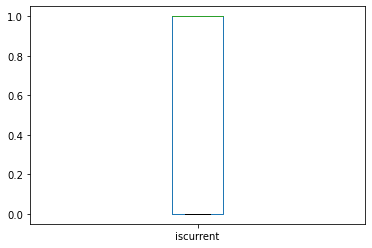

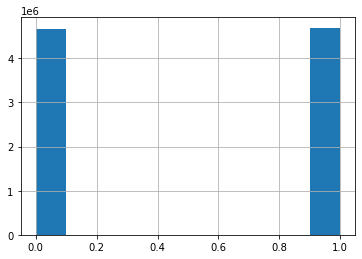

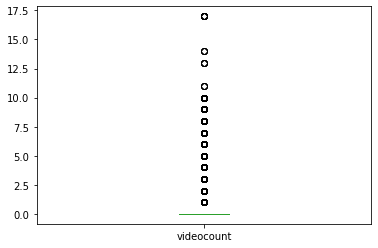

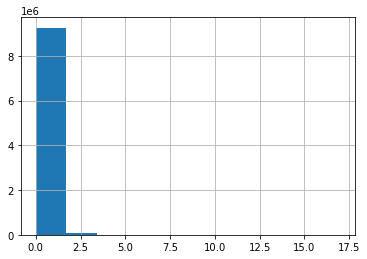

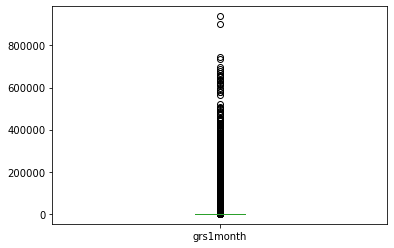

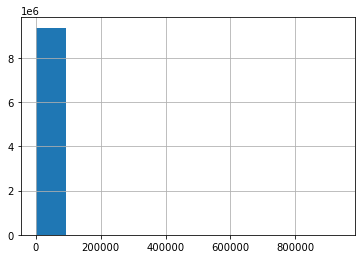

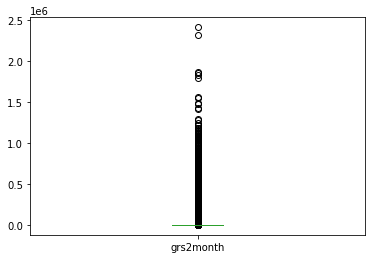

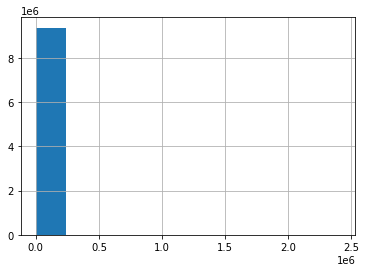

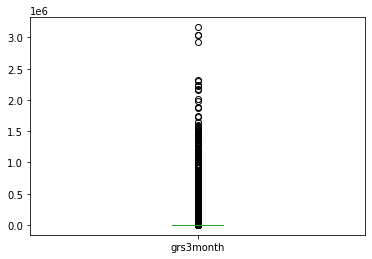

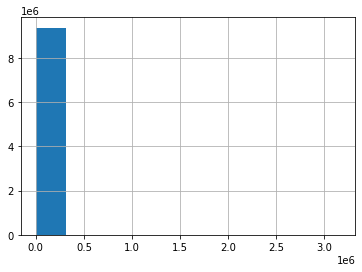

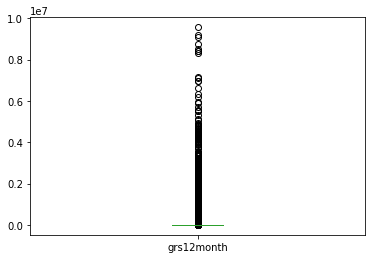

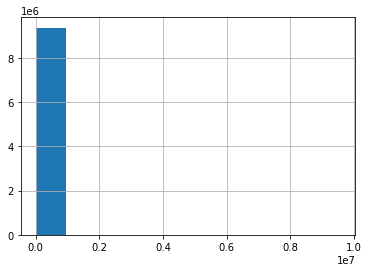

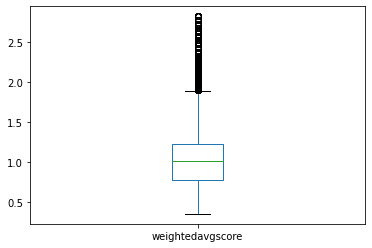

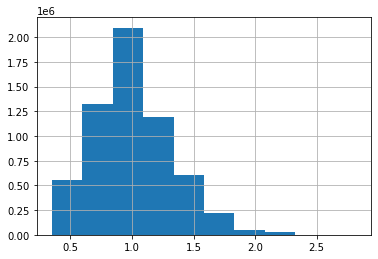

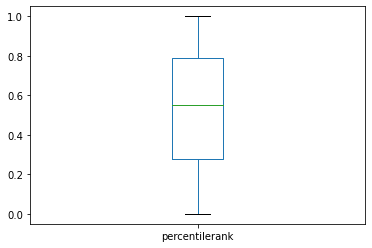

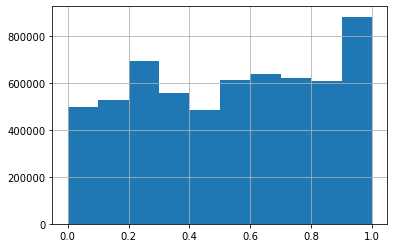

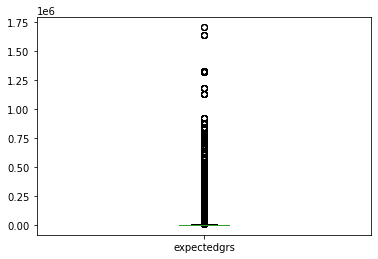

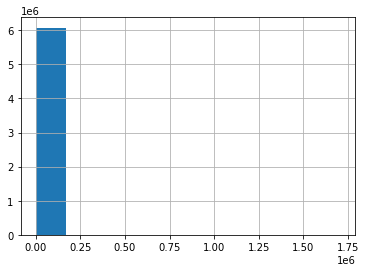

In [27]:
'''
Plot boxplot and histagram for each numerical variables
'''
for col, dtype in zip(df_Supplier.columns, df_Supplier.dtypes):
    if dtype not in ['float', 'int', 'float64', 'int64']: continue
    
    # Quick and dirty outlier filtering, anything over 2 std deviations from the mean 
    # filtered out.     
    df_Supplier[col].plot.box()
    plt.show()
    
    df_Supplier[col].hist(bins=10)
    plt.show()

## Merge tables

In [36]:
'''
Data sets all have different rows
'''
[df_Supplier.shape, df_ContentRecomm.shape, df_ModuleCount.shape]

[(9358854, 20), (7652996, 5), (196910, 5)]

In [11]:
'''
Join df_Supplier with df_ContentRecomm
'''

temp = pd.merge( df_Supplier, df_ContentRecomm
                     , how='left'
                     , left_on=['prsku'], right_on=['prsku']
               , suffixes=('', '_CR'))

In [31]:
'''
It seems like many null value from df_ContentRecomm. Are they really exist or just the product from left join?
'''

temp[temp['clid_CR'].isnull()].head(5)

# df_A_Test df_B_Content  df_ModuleCount 

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs,clid_CR,percentilerank_CR,biccontenttypename,hasbiccontenttype
164,AACL2547,3,Wayfair UK,15,Area Rugs,Rugs,1,0,0,0,20,0,0,0.00000,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,AACL2661,3,Wayfair UK,15,Area Rugs,Rugs,1,0,6,0,55,0,0,60.28361,60.28361,60.28361,60.28361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1622,AAJD3326,3,Wayfair UK,22,End Tables,Entertainment Furniture,1,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2747,AALT1269,3,Wayfair UK,22,End Tables,Entertainment Furniture,1,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2748,AALT1270,3,Wayfair UK,22,End Tables,Entertainment Furniture,1,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
'''
They really don't have rows match with df_Supplier. One assumption is that, 
these products don't have Rich Media content
'''

df_ContentRecomm[(df_ContentRecomm['prsku']=='AACL2547')&(df_ContentRecomm['percentilerank_CR']=='15')]

,prsku,clid,percentilerank,biccontenttypename,hasbiccontenttype


In [12]:
'''
Let's check if it aligns with column "iswaymore".
It seems like not a good indicator.
However, column "iscurrent" seems to have pretty identical "0" value
'''

temp[(temp['iswaymore']==1)&(temp['clid_CR'].isnull())].head()

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs,clid_CR,percentilerank_CR,biccontenttypename,hasbiccontenttype
59141,ANDV4680,6,Wayfair CA,15,Area Rugs,Rugs,4878,1,3,2,28,0,0,118.441526,180.295598,180.295598,330.426404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63210,ASGA2479,1,Wayfair,22,End Tables,Entertainment Furniture,2009,1,5,0,43,0,0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64239,ASTG7474,6,Wayfair CA,15,Area Rugs,Rugs,2852,1,0,0,1,0,0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66893,BAA1471,6,Wayfair CA,9,Bar Stools,Furniture - Kitchen and Dining,1027,1,1,0,23,0,0,0.000000,256.177448,256.177448,1099.982360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110447,ACOT6826,1,Wayfair,15,Area Rugs,Rugs,120,1,0,0,5,0,0,0.000000,0.000000,0.000000,1587.509600,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
temp[(temp['iswaymore']==1)&(temp['clid_CR'].isnull())]['iscurrent'].value_counts(dropna=False)

0    6414
Name: iscurrent, dtype: int64

In [5]:
'''
Let's check the product which has waymore content(iswaymore=1) and also
use the recommended content type (hasbiccontenttype=1)

What's their performance in placedorder in contract to those who didn't use waymore content, or 
use waymore content but not use recommended content type 
'''

## average placedorder
[temp[(temp['iswaymore']==1)&(temp['hasbiccontenttype']==1)]['placedorder'].mean(),
temp[(temp['iswaymore']==1)&(temp['hasbiccontenttype']==0)]['placedorder'].mean(),
temp[(temp['iswaymore']==0)&(temp['hasbiccontenttype']==0)]['placedorder'].mean()]

[2.151157725391133, 2.5348595066171886, 0.5799887497090231]

In [6]:
## median placedorder
[temp[(temp['iswaymore']==1)&(temp['hasbiccontenttype']==1)]['placedorder'].median(),
temp[(temp['iswaymore']==1)&(temp['hasbiccontenttype']==0)]['placedorder'].median(),
temp[(temp['iswaymore']==0)&(temp['hasbiccontenttype']==0)]['placedorder'].median()]

[0.0, 0.0, 0.0]

In [34]:
'''
Let's check column "iscurrent".
The result shows that all the null values shows up when iscurrent equals to zero,
However, it couldn't confirm that it is a good indicator.

ps. iscurrent: A flag of whether the SKU is from the current snapshot of Merch Cube, 
1 = current, 0 = 30 days ago   snapshot
'''

temp[(temp['iswaymore']==1) & (temp['iscurrent']!=0) & (temp['clid_CR'].isnull())]

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs,clid_CR,percentilerank_CR,biccontenttypename,hasbiccontenttype


In [14]:
'''
Let's try to combine df_ContentRecomm with df_ModuleCount
'''

temp2 = pd.merge( df_ContentRecomm, df_ModuleCount
                     , how='left'
                     , left_on=['prsku'], right_on=['prsku']
               , suffixes=('', '_MC'))

In [15]:
temp2[temp2['clid_MC'].isnull()].sort_values(by='prsku').head(15)

,prsku,clid,percentilerank,biccontenttypename,hasbiccontenttype,modulecount,clid_MC,clname,mkcname
73028,AAAM1028,21,NaN,Safety Certifications & Details,0,NaN,NaN,NaN,NaN
273644,AAAM1028,21,NaN,Dimensions,0,NaN,NaN,NaN,NaN
63673,AAAM1028,21,NaN,What's In the Box,0,NaN,NaN,NaN,NaN
185140,AAAM1028,21,NaN,Product Feature,0,NaN,NaN,NaN,NaN
59021,AAAM1029,21,NaN,Dimensions,0,NaN,NaN,NaN,NaN
54449,AAAM1029,21,NaN,What's In the Box,0,NaN,NaN,NaN,NaN
298184,AAAM1029,21,NaN,Safety Certifications & Details,0,NaN,NaN,NaN,NaN
288020,AAAM1029,21,NaN,Product Feature,0,NaN,NaN,NaN,NaN
152518,AAAM1032,21,NaN,Safety Certifications & Details,0,NaN,NaN,NaN,NaN
250486,AAAM1032,21,NaN,What's In the Box,0,NaN,NaN,NaN,NaN


In [ ]:
'''
(Warn: Too big to run!!)
Assuming all merging are correct, we merge them together without check
'''
# df_Supplier = df_Supplier.add_prefix('SP_')
# df_ContentRecomm = df_ContentRecomm.add_prefix('CR_')
# df_ModuleCount = df_ModuleCount.add_prefix('MC_')
# df_ModuleCount = df_ModuleCount.add_prefix('AT_')


# # data_frames = [df_Supplier, df_ContentRecomm, df_ModuleCount, df_A_Test]

# temp = pd.merge( df_Supplier, df_ContentRecomm
#                      , how='outer'
#                      , left_on=['SP_prsku'], right_on=['CR_prsku'] ).fillna('void')

# temp = pd.merge( temp, df_ModuleCount
#                      , how='outer'
#                      , left_on=['SP_prsku'], right_on=['MC_prsku'] ).fillna('void')

# temp = pd.merge( temp, df_A_Test
#                      , how='outer'
#                      , left_on=['SP_clid'], right_on=['AT_clid'] ).fillna('void')